# Dienhart - Scientific Computing Project 1 
## Check the github upload to see animations:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tabulate as tb
from matplotlib import style
plt.style.use('dark_background')
np.warnings.filterwarnings('ignore')

A

In [3]:
A = np.mat([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]]);

B = np.mat([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]]);

y = np.mat([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180]);


In [4]:
E1 = np.concatenate((A, B),axis=1)
E2 = np.concatenate((B, A),axis=1)
Et = np.vstack((np.hstack(A,B),np.hstack(B,A))
E = np.concatenate((E1, E2),axis=0)
I1 = np.concatenate((np.identity(7),np.zeros([7,7])),axis=1)
I2 = np.concatenate((np.zeros([7,7]),-1*np.identity(7)),axis=1)
S = np.concatenate((I1,I2),axis=0)
z = np.concatenate((np.transpose(y),np.transpose(-y)),axis=0)

In [5]:
def mn(M):
    Mh=np.asmatrix(M)
    Mr=np.max(np.matrix.sum(np.abs(Mh),axis=0))
    return Mr

In [6]:
def condO(M):
    MI=np.linalg.inv(M)
    Minfn=mn(M)
    MIinfn=mn(MI)
    return Minfn*MIinfn

In [7]:
o1=0.800
o2=1.146
o3=1.400
Mo1=E-o1*S
Mo2=E-o2*S
Mo3=E-o3*S
Co1=condO(Mo1)
Co2=condO(Mo2)
Co3=condO(Mo3)
print("Condition Number 1 is " + str(Co1),"\nCondition Number 2 is " + str(Co2),"\nCondition Number 3 is " + str(Co3))

Condition Number 1 is 327.8167042420993 
Condition Number 2 is 152679.26875233962 
Condition Number 3 is 227.19443667104443


B

In [8]:
dw=.0005
print("The Boundary on omega 1 is " + str(Co1*mn(dw*S) / mn(Mo1)))
print("The Boundary on omega 2 is " + str(Co2*mn(dw*S) / mn(Mo2)))
print("The Boundary on omega 3 is " + str(Co3*mn(dw*S) / mn(Mo3)))

The Boundary on omega 1 is 0.005220745069573264
The Boundary on omega 2 is 2.405035267453586
The Boundary on omega 3 is 0.003550402778930867


C

In [9]:
def lu_factorize(M):
    n = len(M)
    L = np.identity(n)
    Linny = np.identity(n)
    U = np.copy(M)
    
    for i in range(n):
        for j in range(i+1,n):
            rat = float(U[j][i])/U[i][i]
            L[j][i]=rat
            for r in range(i,n):
                if (r < n):
                    U[j][r] -= rat * U[i][r]
                    Linny[j][r]-= rat*Linny[i][r]
    return L, U,Linny

In [10]:
def forward_substitute(L,z):
    sol=np.zeros(len(z))
    for i in range(len(z)):
        tot=0
        for j in range(i):
            tot+=L[i,j]*sol[j]
        sol[i]=(z[i]-tot)/L[i,i]
    return sol.reshape(-1,1)

In [11]:
def back_substitute(U,y):
    n=len(U)
    x = np.zeros(n)
    
    for i in range(n-1, -1, -1):
        tmp = y[i]
        for j in range(n-1, i, -1):
            tmp -= x[j]*U[i,j]
        if (U[i][i] != 0):
            x[i] = tmp/U[i,i]
    x = x[np.newaxis]
    return x.T

In [13]:
sample_matrix_1 = np.array([[2,1,1],[4,1,4],[-6,5,3]])
sample_result_1 = np.array([[4.],[11.],[4.]])

In [14]:
lp1, up1, linp1 = lu_factorize(sample_matrix_1)
p1 = forward_substitute(lp1,sample_result_1)
p2 = back_substitute(up1,p1)
res1 = (sample_matrix_1.dot(p2))
np.round(res1-sample_result_1,2)

array([[ 0.],
       [ 0.],
       [-0.]])

D

In [15]:
def LHS(omega):
    sol = E - omega*S
    return sol
def solve_omega(omega):
    lhs = LHS(omega)
    L,U,Linny = lu_factorize(lhs)
    bn = forward_substitute(L,z)
    sol = back_substitute(U,bn)
    x = np.dot(z.T,sol)

    return x

In [16]:
dw=.0005
r1l = solve_omega(0.800-dw)
r1h = solve_omega(0.800+dw)
r1 = solve_omega(0.800)
r2l = solve_omega(1.146-dw)
r2h = solve_omega(1.146+dw)
r2 = solve_omega(1.146)
r3l = solve_omega(1.400-dw)
r3h = solve_omega(1.400+dw)
r3 = solve_omega(1.400)
r1var = np.max([r1-r1l,r1h-r1])
r2var = np.max([r2-r2l,r2h-r2])
r3var = np.max([r3-r3l,r3h-r3])

In [17]:
print("Input \u03C9 with operational variation \u03B4\u03C9 carry-over table: ")
print("\u03B1( \u03C9  \u00B1   \u03B4\u03C9   ) ->  \u03B1  \u00B1  \u03B4 \u03B1") 
print("\u03B1(0.800 \u00B1 0.0005) -> " + str(float(r1)) + "  \u00B1  " + str(r1var))
print("\u03B1(1.146 \u00B1 0.0005) -> " + str(float(r2)) + "  \u00B1  " + str(r2var))
print("\u03B1(1.400 \u00B1 0.0005) -> " + str(float(r3)) + "  \u00B1  " + str(r3var))

Input ω with operational variation δω carry-over table: 
α( ω  ±   δω   ) ->  α  ±  δ α
α(0.800 ± 0.0005) -> 1.6361381324822442  ±  0.008322433605708834
α(1.146 ± 0.0005) -> 2609.2353238405203  ±  1614.4823322103439
α(1.400 ± 0.0005) -> -2.7068926580010584  ±  0.006987455515579999


In [18]:
Bmax = r2var/dw

In [69]:
print("Maximum variation (upper bound in question for \u03B4\u03B1) seen here is 1614.4823322103439, so a change in \u03B4\u03C9 here was met with a \u03B4\u03B1 maximally affected by B(1.146)|\u03B4\u03C9|. Since we know the second term, we can solve this to find our maximal ""B"" value (DB/Dw=0) to be " + str(Bmax))
print("\nThis B index can be easily solved for, but that (call it 1615) upper bound will always be the maximum variation (largest condition number at that point, even among singularities)")

Maximum variation (upper bound in question for δα) seen here is 1614.4823322103439, so a change in δω here was met with a δα maximally affected by B(1.146)|δω|. Since we know the second term, we can solve this to find our maximal B value (DB/Dw=0) to be 3228964.6644206876

This B index can be easily solved for, but that (call it 1615) upper bound will always be the maximum variation (largest condition number at that point, even among singularities)


E

In [20]:
xh = np.linspace(.70, 1.5, 1000)
wretch = np.zeros((1000,2))
for i in range(0,999):
    wretch[i][0]=i
    wretch[i][1]=solve_omega(xh[i])

Text(0.5, 1.0, 'α distribution')

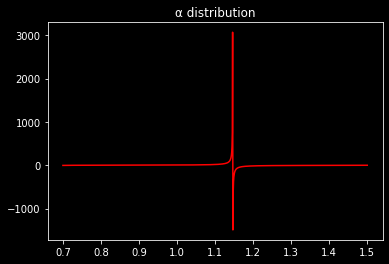

In [21]:
plt.plot(xh,wretch[:,1],"red")
plt.title("\u03B1 distribution")

F

In [41]:
def householder_slow(M):
    m,n = M.shape
    R = np.copy(M)
    Q = np.eye(m)
    for k in range(n):
        asub = R[k:,k:]
        c1 = np.expand_dims(asub[:,0], axis=1)
        hite = len(asub)
        e = np.zeros((hite, 1))
        e[0] = 1
        
        alpha = -np.sign(c1[0]) * np.linalg.norm(c1)
        u = c1-alpha*(e)
        const = 2/(np.linalg.norm(u)*np.linalg.norm(u))  

        Hs = np.eye(hite) - const * (u.dot(np.transpose(u)))
        Ht = Hs.dot(asub)
        
        idhere=np.eye(m)
        idhere[k:,k:]=Hs
        
        Q = Q.dot(idhere)
        
        R = idhere.dot(R)

    return np.round(Q,3),np.round(R,3),np.round(Q.dot(R),3)
        

In [42]:
def householder_fast(M):
    m,n = M.shape
    R = np.copy(M)
    Q = np.eye(m)
    fin=np.zeros((m+1,n))
    for k in range(n):
        asub = R[k:,k:]
        c1 = np.expand_dims(asub[:,0], axis=1)
        hite = len(asub)
        e = np.zeros((hite, 1))
        e[0] = 1
        
        alpha = -np.sign(c1[0]) * np.linalg.norm(c1)
        u = c1-alpha*(e)
        fin[k+1:k+1+hite,[k]]=u
        
        const = 2/(np.linalg.norm(u)*np.linalg.norm(u))  
        Hs = np.eye(hite) - const * (u.dot(np.transpose(u)))
        Ht = Hs.dot(asub)
        
        idhere=np.eye(m)
        idhere[k:,k:]=Hs
        
        R = idhere.dot(R)
        if (k==n-1):
            z = np.zeros((m-n,n))
            rn = np.round(np.vstack((R,z)),3)
            fin = fin + rn
    return fin
        

In [43]:
def least_squares(A,b):
    Q, R, t = householder_slow(A)
    Qt = np.transpose(Q)
    bn = Qt.dot(b)
    
    C = R
    C = C[~np.all(C == 0, axis=1)]
    
    rem = int(np.shape(C[1])[0])
    
    bnn=np.reshape(np.array(bn),(-1,1))
    bnn= bnn[:rem,:]
    k = rem-len(C)
    if (k>0):
        C_adjust = np.zeros((k,rem))
        C = np.vstack((C, C_adjust))

    b4s = np.copy(bnn)
    x = back_substitute(C,b4s)
    
    num = A.dot(x)
    r = np.linalg.norm(b-A.dot(x))
    
    
    return x, r ,C
    

In [44]:
A1 = np.array([[1,2],[3,4],[5,6]])
b1 = np.array([1,2,3])

In [45]:
A2 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
b2 = np.array([1,2,3,4])
A2sol, A2r ,C2 = least_squares(A2,b2)

In [46]:
A1sol, A1r, C = least_squares(A1,b1)

In [47]:
print("The upper triangle adjustment in A1x=b1 is ")
print(C)
print("And solution ""x"" is")
print(np.round(A1sol,3))

The upper triangle adjustment in A1x=b1 is 
[[-5.916 -7.437]
 [-0.     0.828]]
And solution x is
[[-0. ]
 [ 0.5]]


In [48]:
# test against numpy linear regression
nplsol, nplres, nplrank, npls = np.linalg.lstsq(A1,b1)

In [49]:
print(np.round(nplsol,3))

[0.  0.5]


G

In [31]:
def rel_error(a,b,xc):
    re = np.abs(np.linalg.norm(a.dot(xc)-b))/np.linalg.norm(b)
    return re

In [74]:
def Psolve(n,wp):

    xx = np.linspace(.70, wp, 1000)
    nh = len(xx)
    www = np.zeros((nh,n+1))
    for i in range(nh):
        for j in range(0,n+1):
            www[i,j]=xx[i]**(2*j)
    w2 = np.zeros(nh)
    for i in range(nh):
        w2[i]=solve_omega(xx[i])
    w2 = np.array([w2]).T
    xsol, rem, C = least_squares(www,w2)
    sol, res, rank, s = np.linalg.lstsq(www,w2)
    re = rel_error(www,w2,sol)
    ren = rel_error(www,w2,xsol)
    return re, ren, sol

In [75]:
r1, r2, r3 = Psolve(4,1)
r11, r22, r33 = Psolve(6,1)

In [78]:
print("Coefficients of n=4 are:\n " + str(r3))

Coefficients of n=4 are:
 [[ -202.3835334 ]
 [ 1027.70238878]
 [-1935.25663123]
 [ 1610.48454674]
 [ -495.2060484 ]]


Choice of Upper Bound needs to before the singularity, else the mean approximation (minimizing residuals) will be skewn. To test this idea, let's take a look at the residuals before, after, and through the singularity position(s).

In [50]:
span = 7
r = np.zeros((span,2))
for k in range(1,21):
    p = np.round(0.90+.05*k,3)
    for i in range(1,span):
        a, b = Psolve(i,p)
        r[i,0]=i
        r[i,1]=a
    plt.figure()
    x,y=zip(*r[1:,:])
    plt.plot(x,y,color="lightblue")
    plt.scatter(x,y,color="blue")
    plt.title("Relative Errors with \u03C9 = %f as n \u2192 6" % p)
    plt.xlim([.5,6.5])
    plt.yscale("log")
    plt.xlabel("n")
    plt.ylim([10**(-3),1.5])
    plt.ylabel("Relative Error (Log)")
    plt.savefig('/Users/jackdienhart/Desktop/output/o%f.png'% k)
    plt.close()

Below is an animation, see github link

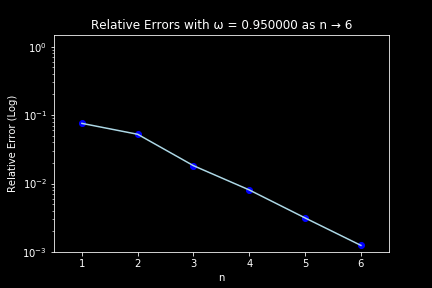

In [256]:
from IPython.display import Image
Image(filename="/Users/jackdienhart/Desktop/gif1.gif")

Text(0.5, 1.0, 'Relative Errors of Polynomial Approximate')

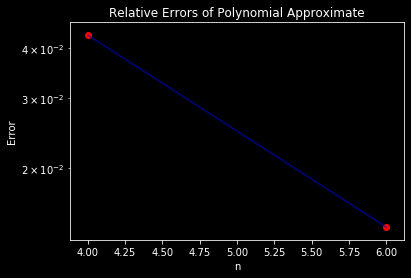

In [36]:
res4, tt4 = Psolve(4,1)
res6, tt6 = Psolve(6,1)
xpp = (4,6)
ypp = (res4,res6)
plt.yscale('log')
plt.plot(xpp,ypp,'blue',alpha=.5)
plt.scatter(xpp,ypp,c ='red')
plt.xlabel('n')
plt.ylabel('Error')
plt.title("Relative Errors of Polynomial Approximate")

In [206]:
def Rational(n,upper_bound,lower_bound,lattice_count):
    steps = lattice_count
    x = np.linspace(lower_bound, upper_bound, steps)
    alpha=np.zeros(steps)
    for i in range(0,steps):
        alpha[i]=solve_omega(x[i])
    
    w = np.zeros((steps,2*n+1))
    for i in range(steps):
        for j in range(0,2*n+1):
            if (j<=n):
                w[i,j]=x[i]**(j)
            else:
                w[i,j]=-alpha[i]*(x[i]**(j-n))
    #xsol, rem = least_squares(www,w2)
    #return xsol#,www,np.array([w2]).T
    alpha = np.array([alpha]).T
    sol, res, rank, s = np.linalg.lstsq(w,alpha)
    res = np.zeros(steps)

    a = np.zeros(n+1)
    b = np.zeros(n)
    a = sol[0:(n+1)]
    b = sol[(n+1):(2*n+1)]
    
    num=np.zeros(steps)
    den=np.zeros(steps)
    for i in range(steps):
        den[i] = 1
        for m in range(n+1):
            num[i]+=a[m]*(x[i]**(m))
            if (m < n):
                den[i]+=b[m]*(x[i]**(m+1))
    
    Qs = np.zeros(steps)
    for i in range(steps):
        Qs[i]=num[i]/den[i]
        
    res=np.array([res]).T
    re = rel_error(w,alpha,sol)

    return a,b,Qs,alpha, x, re

In [233]:
acn2, bn2, Qn2, an2, lnsp2, ren2 = Rational(2,1.5,0.73,2000)
acn4, bn4, Qn4, an4, lnsp4, ren4 = Rational(4,1.5,0.73,2000)

In [244]:
print("For n=2 my coefficients for ""a"" and ""b"" are: \n",acn2,"\n and\n",bn2,"\n")
print("For n=4 my coefficients for ""a"" and ""b"" are: \n",acn4,"\n and\n",bn4)

For n=2 my coefficients for a and b are: 
 [[ 1.99858819]
 [-3.59711751]
 [ 1.20133656]] 
 and
 [[-2.41854841]
 [ 1.34883669]] 

For n=4 my coefficients for a and b are: 
 [[ 1.97172673]
 [-3.89535004]
 [ 1.61894638]
 [ 0.05155772]
 [-0.00835134]] 
 and
 [[-2.00273366]
 [-0.16313602]
 [ 1.91451325]
 [-0.79556623]]


Text(0.5, 1.0, 'Rational n = 2 Approximation of vs α')

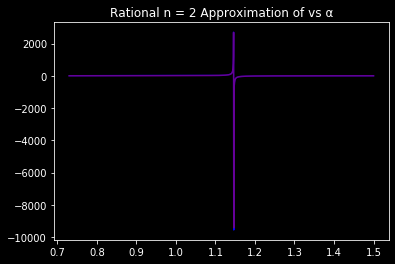

In [181]:
plt.plot(lnsp2,Qn2,"blue")
plt.plot(lnsp2,an2,"red",alpha=.4)
plt.title("Rational n = 2 Approximation of vs \u03B1")

Text(0.5, 1.0, 'Rational n = 4 Approximation of vs α')

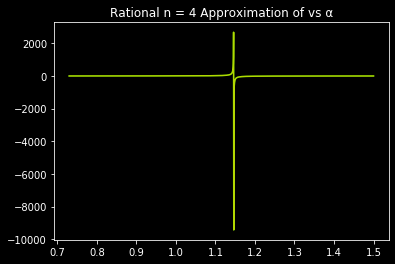

In [202]:
plt.plot(lnsp4,Qn4,"green")
plt.plot(lnsp4,an4,"yellow",alpha=.7)
plt.title("Rational n = 4 Approximation of vs \u03B1")

In [186]:
def res_rel_error(Q,a):
    n = len(Q)
    r = np.zeros(n)
    for i in range(len(Q)):
        r[i] = Q[i]-a[i]
    res = np.linalg.norm(r)/np.linalg.norm(a)
    return res
    

<Figure size 432x288 with 0 Axes>

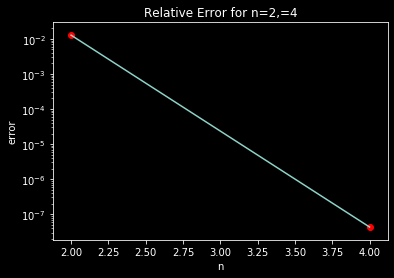

<Figure size 432x288 with 0 Axes>

In [203]:
rlist=np.zeros((3,2))
for i in range(3):
    rlist[i,0]=2*i
rlist[1,1]=res_rel_error(Qn2,an2)
rlist[2,1]=res_rel_error(Qn4,an4)
x,y=zip(*rlist[1:,:])
plt.yscale("log")
plt.plot(x,y)
plt.xlabel('n')
plt.ylabel('error')
plt.title('Relative Error for n=2,=4')
plt.scatter(x,y,color="red")
plt.figure()



In [209]:
span = 11
r = np.zeros((span,2))


for i in range(2,span,2):
    a,b, Qs, allpha, xx, re = Rational(i,4,-4,4000)
    er = np.linspace(-4, 4, 4000)
    plt.figure()
    plt.plot(er,Qs,"blue",label='approximate')
    plt.plot(er,allpha,"red",alpha=.3,label='\u03B1')
    plt.title("rational approximation of \u03B1 given \u03C9 at n = %s" % i)
    plt.xlabel("\u03C9")
    plt.ylabel("\u03B1")
    plt.ylim([-1500,1500])
    plt.legend([Qs,allpha],['Qapprox','alpha'])
    legend = plt.legend(loc="upper right", edgecolor="black")
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((0, 0, 1, 0.1))
    plt.savefig('/Users/jackdienhart/Desktop/o%f.png'% i)
    plt.close()

Below is an animation. Check githhub for gif.

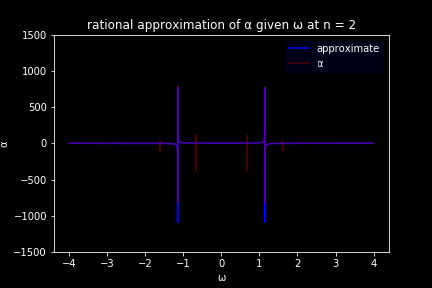

In [210]:
Image(filename="/Users/jackdienhart/Desktop/final.gif")

<Figure size 432x288 with 0 Axes>

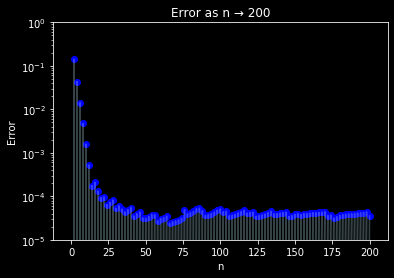

<Figure size 432x288 with 0 Axes>

In [70]:
span = 201
r = np.zeros((span,2))
k = np.zeros((span,2))

for i in range(2,span,2):
    a, b = Psolve(i,1)
    r[i,0]=i
    r[i,1]=a
    #k[i,0]=i
    #k[i,1]=b
x1a,y1a=zip(*r[1:,:])
#x2a,y2a=zip(*k[1:,:])
plt.yscale("log")
plt.plot(x1a,y1a,color='lightblue',alpha=.3)
#plt.plot(x1a, y1a,color="red",alpha=.3)
plt.scatter(x1a,y1a,color="blue")
#plt.scatter(x2a,y2a,color="purple", alpha=.5)
plt.title("Error as n \u2192 200")
plt.ylim([10**(-5),1])
plt.xlabel("n")
plt.ylabel("Error")
plt.figure()

<Figure size 432x288 with 0 Axes>

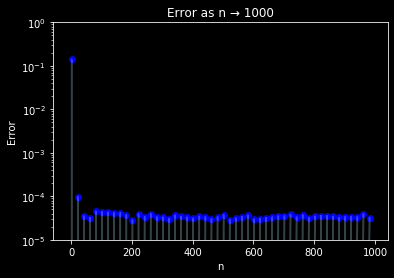

<Figure size 432x288 with 0 Axes>

In [71]:
span = 1001
r = np.zeros((span,2))
k = np.zeros((span,2))

for i in range(2,span,20):
    a, b = Psolve(i,1)
    r[i,0]=i
    r[i,1]=a
    #k[i,0]=i
    #k[i,1]=b
x1a,y1a=zip(*r[1:,:])
#x2a,y2a=zip(*k[1:,:])
plt.yscale("log")
plt.plot(x1a,y1a,color='lightblue',alpha=.3)
#plt.plot(x1a, y1a,color="red",alpha=.3)
plt.scatter(x1a,y1a,color="blue")
#plt.scatter(x2a,y2a,color="purple", alpha=.5)
plt.title("Error as n \u2192 1000")
plt.ylim([10**(-5),1])
plt.xlabel("n")
plt.ylabel("Error")
plt.figure()